___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Tensorflow Project Exercise
Let's wrap up this Deep Learning by taking a a quick look at the effectiveness of Neural Nets!

We'll use the [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

This sort of task is perfectly suited for Neural Networks and Deep Learning! Just follow the instructions below to get started!

## Get the Data

** Use pandas to read in the bank_note_data.csv file **

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('bank_note_data.csv')

** Check the head of the Data **

In [3]:
df.head()

Image.Var  Image.Skew  Image.Curt  Entropy  Class
0    3.62160      8.6661     -2.8073 -0.44699      0
1    4.54590      8.1674     -2.4586 -1.46210      0
2    3.86600     -2.6383      1.9242  0.10645      0
3    3.45660      9.5228     -4.0112 -3.59440      0
4    0.32924     -4.4552      4.5718 -0.98880      0

Image.Var  Image.Skew  Image.Curt  Entropy  Class
0    3.62160      8.6661     -2.8073 -0.44699      0
1    4.54590      8.1674     -2.4586 -1.46210      0
2    3.86600     -2.6383      1.9242  0.10645      0
3    3.45660      9.5228     -4.0112 -3.59440      0
4    0.32924     -4.4552      4.5718 -0.98880      0

## EDA

We'll just do a few quick plots of the data.

** Import seaborn and set matplolib inline for viewing **

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Create a Countplot of the Classes (Authentic 1 vs Fake 0) **

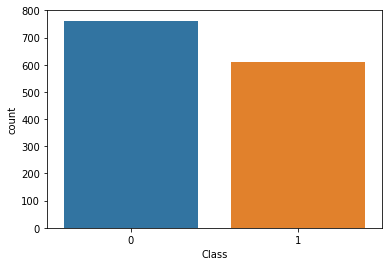

In [5]:
sns.countplot(data=df, x='Class')

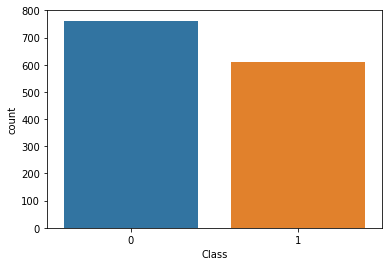

** Create a PairPlot of the Data with Seaborn, set Hue to Class **

C:\Anaconda3\envs\ds_nauka\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda3\envs\ds_nauka\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Anaconda3\envs\ds_nauka\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


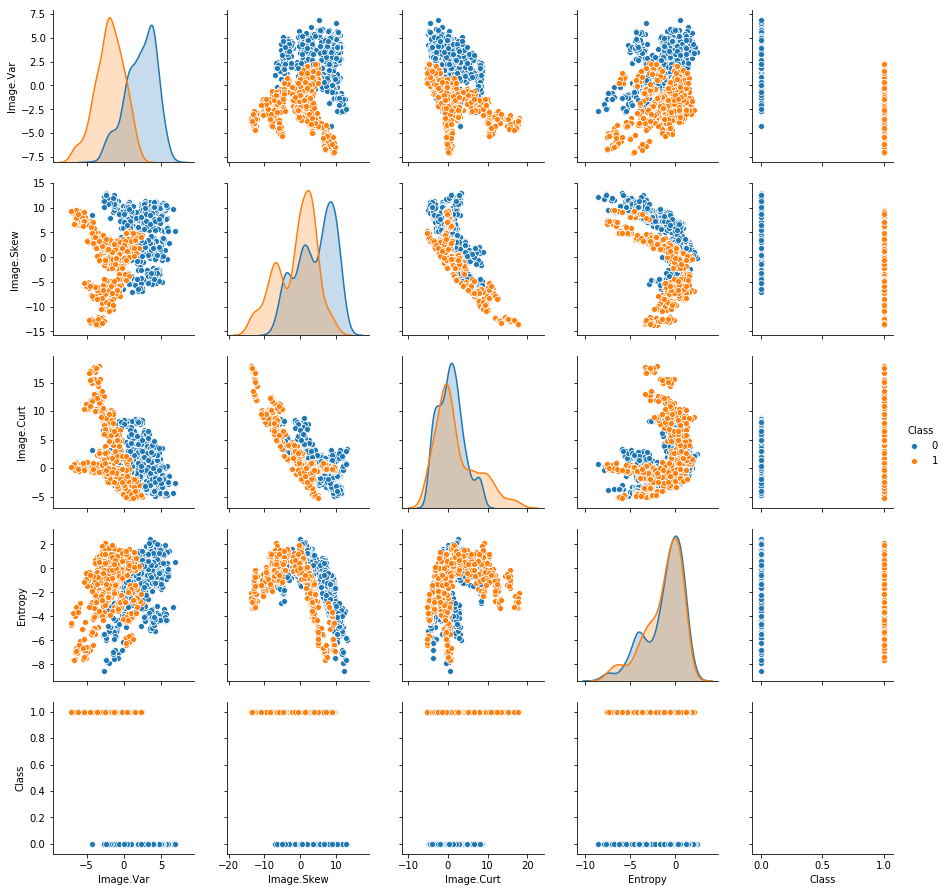

In [6]:
sns.pairplot(data=df,hue='Class')

C:\Users\Marcial\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Marcial\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Marcial\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


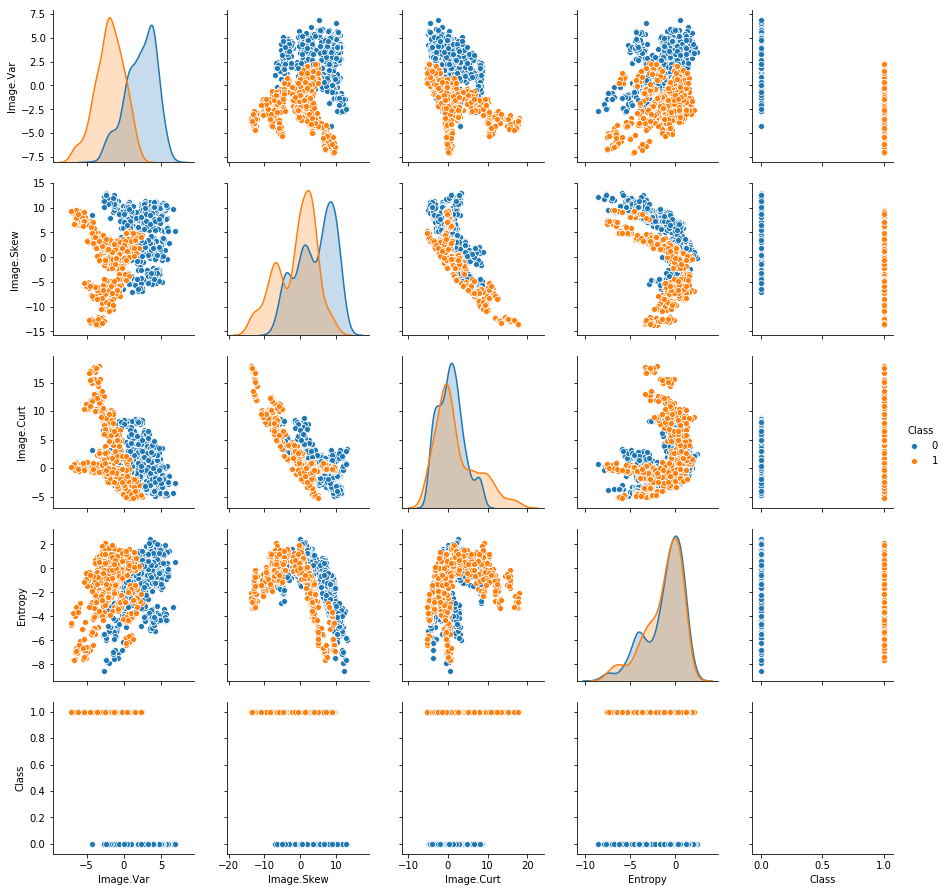

## Data Preparation 

When using Neural Network and Deep Learning based systems, it is usually a good idea to Standardize your data, this step isn't actually necessary for our particular data set, but let's run through it for practice!

### Standard Scaling



In [7]:
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object called scaler.**

In [8]:
scaler = StandardScaler()

**Fit scaler to the features.**

In [10]:
scaler.fit(df.drop('Class',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [11]:
scaled = scaler.fit_transform(df.drop('Class',axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [24]:
df_feat = pd.DataFrame(scaled,columns=df.columns[:-1])

In [25]:
df_feat.head()

Image.Var  Image.Skew  Image.Curt   Entropy
0   1.121806    1.149455   -0.975970  0.354561
1   1.447066    1.064453   -0.895036 -0.128767
2   1.207810   -0.777352    0.122218  0.618073
3   1.063742    1.295478   -1.255397 -1.144029
4  -0.036772   -1.087038    0.736730  0.096587

Image.Var  Image.Skew  Image.Curt   Entropy
0   1.121806    1.149455   -0.975970  0.354561
1   1.447066    1.064453   -0.895036 -0.128767
2   1.207810   -0.777352    0.122218  0.618073
3   1.063742    1.295478   -1.255397 -1.144029
4  -0.036772   -1.087038    0.736730  0.096587

## Train Test Split

** Create two objects X and y which are the scaled feature values and labels respectively.**

In [26]:
X = df_feat

In [27]:
y = df['Class']

** Use SciKit Learn to create training and testing sets of the data as we've done in previous lectures:**

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Tensorflow

In [30]:
import tensorflow as tf

C:\Anaconda3\envs\ds_nauka\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


C:\Users\Marcial\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


** Create a list of feature column objects using tf.feature.numeric_column() as we did in the lecture**

In [33]:
df_feat.columns

Index(['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy'], dtype='object')

Index(['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy'], dtype='object')

In [34]:
image_var = tf.feature_column.numeric_column("Image.Var")
image_skew = tf.feature_column.numeric_column('Image.Skew')
image_curt = tf.feature_column.numeric_column('Image.Curt')
entropy =tf.feature_column.numeric_column('Entropy')

In [35]:
feat_cols = [image_var,image_skew,image_curt,entropy]

In [37]:
feat_cols

[_NumericColumn(key='Image.Var', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Image.Skew', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Image.Curt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Entropy', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [38]:
feat_cols = []

for col in X.columns:
    feat_cols.append(tf.feature_column.numeric_column(col))

In [39]:
feat_cols

[_NumericColumn(key='Image.Var', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Image.Skew', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Image.Curt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Entropy', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

** Create an object called classifier which is a DNNClassifier from learn. Set it to have 2 classes and a [10,20,10] hidden unit layer structure:**

In [40]:
classifier = tf.estimator.DNNClassifier(n_classes=2, hidden_units=[10,20,10],feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Mariusz\\AppData\\Local\\Temp\\tmpiw8x_jzh', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000000024C6F9E8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Marcial\\AppData\\Local\\Temp\\tmpw8v7z_z6', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000026BBA0F9FD0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


** Now create a tf.estimator.pandas_input_fn that takes in your X_train, y_train, batch_size and set shuffle=True. You can play around with the batch_size parameter if you want, but let's start by setting it to 20 since our data isn't very big. **

In [41]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=20,shuffle=True)

** Now train classifier to the input function. Use steps=500. You can play around with these values if you want!**

*Note: Ignore any warnings you get, they won't effect your output*

In [42]:
classifier.train(input_fn=input_func,steps=500)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Mariusz\AppData\Local\Temp\tmpiw8x_jzh\model.ckpt.
INFO:tensorflow:loss = 13.265277, step = 1
INFO:tensorflow:Saving checkpoints for 48 into C:\Users\Mariusz\AppData\Local\Temp\tmpiw8x_jzh\model.ckpt.
INFO:tensorflow:Loss for final step: 0.41488576.


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Marcial\AppData\Local\Temp\tmpw8v7z_z6\model.ckpt.
INFO:tensorflow:loss = 13.792015, step = 1
INFO:tensorflow:Saving checkpoints for 48 into C:\Users\Marcial\AppData\Local\Temp\tmpw8v7z_z6\model.ckpt.
INFO:tensorflow:Loss for final step: 0.47980386.


## Model Evaluation

** Create another pandas_input_fn that takes in the X_test data for x. Remember this one won't need any y_test info since we will be using this for the network to create its own predictions. Set shuffle=False since we don't need to shuffle for predictions.**

In [43]:
pred_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=len(X_test),shuffle=False)

In [44]:
predictions = list(classifier.predict(input_fn=pred_func))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Mariusz\AppData\Local\Temp\tmpiw8x_jzh\model.ckpt-48
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


** Use the predict method from the classifier model to create predictions from X_test **

In [45]:
predictions[0]

{'logits': array([-6.382805], dtype=float32),
 'logistic': array([0.00168752], dtype=float32),
 'probabilities': array([0.9983125 , 0.00168752], dtype=float32),
 'class_ids': array([0], dtype=int64),
 'classes': array([b'0'], dtype=object)}

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Marcial\AppData\Local\Temp\tmpw8v7z_z6\model.ckpt-48
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'class_ids': array([0], dtype=int64),
 'classes': array([b'0'], dtype=object),
 'logistic': array([0.00157453], dtype=float32),
 'logits': array([-6.4522204], dtype=float32),
 'probabilities': array([0.9984255 , 0.00157453], dtype=float32)}

In [47]:
final_preds = []

for pred in predictions:
    final_preds.append(pred['class_ids'][0])

In [48]:
final_preds

[0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,


** Now create a classification report and a Confusion Matrix. Does anything stand out to you?**

In [49]:
from sklearn.metrics import confusion_matrix, classification_report

In [51]:
print(confusion_matrix(y_test,final_preds))

[[220   4]
 [  0 188]]


In [52]:
print(classification_report(y_test,final_preds))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       224
           1       0.98      1.00      0.99       188

   micro avg       0.99      0.99      0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



[[213   2]
 [ 10 187]]


             precision    recall  f1-score   support

          0       0.96      0.99      0.97       215
          1       0.99      0.95      0.97       197

avg / total       0.97      0.97      0.97       412



## Optional Comparison

** You should have noticed extremely accurate results from the DNN model. Let's compare this to a Random Forest Classifier for a reality check!**

**Use SciKit Learn to Create a Random Forest Classifier and compare the confusion matrix and classification report to the DNN model**

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rfc = RandomForestClassifier(n_estimators=200)

In [55]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [56]:
rfc_pred = rfc.predict(X_test)

In [57]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       224
           1       0.99      1.00      1.00       188

   micro avg       1.00      1.00      1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



In [58]:
print(confusion_matrix(y_test,rfc_pred))

[[223   1]
 [  0 188]]


             precision    recall  f1-score   support

          0       0.99      1.00      0.99       215
          1       0.99      0.99      0.99       197

avg / total       0.99      0.99      0.99       412



[[214   1]
 [  2 195]]


** It should have also done very well, possibly perfect! Hopefully you have seen the power of DNN! **

# Great Job!